<a href="https://colab.research.google.com/github/kat-le/cmpe255-pycaret/blob/main/Multiclass_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip -q install -U pycaret xgboost catboost lightgbm kaggle
!kaggle -v

Kaggle API 1.7.4.5


In [ ]:
from google.colab import files
up = files.upload()

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls -la ~/.kaggle

Saving kaggle.json to kaggle (1).json
total 16
drwxr-xr-x 2 root root 4096 Oct 29 20:39 .
drwx------ 1 root root 4096 Oct 29 20:39 ..
-rw------- 1 root root   65 Oct 29 20:40 kaggle.json


In [ ]:
!mkdir -p data
!kaggle datasets download -d nimapourmoradi/dry-bean-dataset-classification -p data --unzip
!ls -lah data

Dataset URL: https://www.kaggle.com/datasets/nimapourmoradi/dry-bean-dataset-classification
License(s): other
  0% 0.00/1.01M [00:00<?, ?B/s]
100% 1.01M/1.01M [00:00<00:00, 634MB/s]
total 2.4M
drwxr-xr-x 2 root root 4.0K Oct 29 20:40 .
drwxr-xr-x 1 root root 4.0K Oct 29 20:40 ..
-rw-r--r-- 1 root root 2.4M Oct 29 20:40 Dry_Bean_Dataset.csv


In [ ]:
import pandas as pd
import glob, os

csvs = sorted(glob.glob(os.path.join("data", "**", "*.csv"), recursive=True))
csvs

['data/Dry_Bean_Dataset.csv']

In [ ]:
df = pd.read_csv("data/Dry_Bean_Dataset.csv")
target = "Class"
df.shape, df.head(3)

((13611, 17),
     Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
 0  28395    610.291       208.178117       173.888747      1.197191   
 1  28734    638.018       200.524796       182.734419      1.097356   
 2  29380    624.110       212.826130       175.931143      1.209713   
 
    Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
 0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
 1      0.411785       29172     191.272751  0.783968  0.984986   0.887034   
 2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
 
    Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
 0     0.913358      0.007332      0.003147      0.834222      0.998724  SEKER  
 1     0.953861      0.006979      0.003564      0.909851      0.998430  SEKER  
 2     0.908774      0.007244      0.003048      0.825871      0.999066  SEKER  )

In [ ]:
print("Columns:", df.columns.tolist())
print("\nTarget value counts:")
print(df[target].value_counts())
df.isna().sum().sort_values(ascending=False).head(10)

Columns: ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent', 'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3', 'ShapeFactor4', 'Class']

Target value counts:
Class
DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: count, dtype: int64


,0
Area,0
Solidity,0
ShapeFactor4,0
ShapeFactor3,0
ShapeFactor2,0
ShapeFactor1,0
Compactness,0
roundness,0
Extent,0
Perimeter,0


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Area,13611.0,53048.284549,29324.095717,20420.000000,36328.000000,44652.000000,61332.000000,254616.000000
Perimeter,13611.0,855.283459,214.289696,524.736000,703.523500,794.941000,977.213000,1985.370000
MajorAxisLength,13611.0,320.141867,85.694186,183.601165,253.303633,296.883367,376.495012,738.860154
MinorAxisLength,13611.0,202.270714,44.970091,122.512653,175.848170,192.431733,217.031741,460.198497
AspectRation,13611.0,1.583242,0.246678,1.024868,1.432307,1.551124,1.707109,2.430306
Eccentricity,13611.0,0.750895,0.092002,0.218951,0.715928,0.764441,0.810466,0.911423
ConvexArea,13611.0,53768.200206,29774.915817,20684.000000,36714.500000,45178.000000,62294.000000,263261.000000
EquivDiameter,13611.0,253.064220,59.177120,161.243764,215.068003,238.438026,279.446467,569.374358
Extent,13611.0,0.749733,0.049086,0.555315,0.718634,0.759859,0.786851,0.866195
Solidity,13611.0,0.987143,0.004660,0.919246,0.985670,0.988283,0.990013,0.994677


In [ ]:
from pycaret.classification import *
SEED = 42

s = setup(
    data=df,
    target=target,
    session_id=SEED,
    use_gpu=True,
    normalize=True,
    fold=5,
    verbose=False
)

X_train = get_config("X_train")
y_train = get_config("y_train")
print("X_train shape:", X_train.shape)
print("y_train counts:\n", y_train.value_counts())

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split req

In [ ]:
best = compare_models()
best

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9304,0.9938,0.9304,0.9308,0.9304,0.9158,0.9159,3.7400
catboost,CatBoost Classifier,0.9299,0.9938,0.9299,0.9303,0.9299,0.9152,0.9152,5.5120
xgboost,Extreme Gradient Boosting,0.9294,0.9936,0.9294,0.9297,0.9294,0.9145,0.9146,1.0360
gbc,Gradient Boosting Classifier,0.9279,0.0000,0.9279,0.9283,0.9279,0.9127,0.9128,42.0880
lr,Logistic Regression,0.9254,0.0000,0.9254,0.9258,0.9255,0.9097,0.9098,1.0660
knn,K Neighbors Classifier,0.9223,0.9825,0.9223,0.9230,0.9224,0.9060,0.9061,0.4820
et,Extra Trees Classifier,0.9200,0.9918,0.9200,0.9206,0.9201,0.9032,0.9033,0.4160
qda,Quadratic Discriminant Analysis,0.9131,0.0000,0.9131,0.9164,0.9135,0.8951,0.8957,0.1520
lda,Linear Discriminant Analysis,0.9046,0.0000,0.9046,0.9147,0.9063,0.8846,0.8863,0.1500
nb,Naive Bayes,0.8970,0.9900,0.8970,0.8981,0.8970,0.8756,0.8758,0.1020


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

[2025-10-29 20:46:35.974] [CUML] [info] Unused keyword parameter: n_jobs during cuML estimator initialization


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               device='gpu', importance_type='split', learning_rate=0.1,
               max_depth=-1, min_child_samples=20, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaves=31,
               objective=None, random_state=42, reg_alpha=0.0, reg_lambda=0.0,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
top5 = compare_models(n_select=5)
top5

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,20:53:44
Status,. . . . . . . . . . . . . . . . . .,Fitting 5 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Gradient Boosting Classifier


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9254,0.0000,0.9254,0.9258,0.9255,0.9097,0.9098,0.2640
knn,K Neighbors Classifier,0.9223,0.9825,0.9223,0.9230,0.9224,0.9060,0.9061,0.1080
qda,Quadratic Discriminant Analysis,0.9131,0.0000,0.9131,0.9164,0.9135,0.8951,0.8957,0.1640
nb,Naive Bayes,0.8970,0.9900,0.8970,0.8981,0.8970,0.8756,0.8758,0.1020
dt,Decision Tree Classifier,0.8961,0.9361,0.8961,0.8966,0.8961,0.8744,0.8745,0.3000
rf,Random Forest Classifier,0.5553,0.5961,0.5553,0.5555,0.5553,0.5459,0.5459,1.3920
ada,Ada Boost Classifier,0.4964,0.0000,0.4964,0.4640,0.4120,0.3711,0.4282,1.4360
svm,SVM - Linear Kernel,0.0008,0.0000,0.0008,0.0020,0.0012,-0.0415,-0.1584,8.1140


Processing:   0%|          | 0/73 [00:00<?, ?it/s]

[2025-10-29 20:53:45.957] [CUML] [info] Unused keyword parameter: n_jobs during cuML estimator initialization


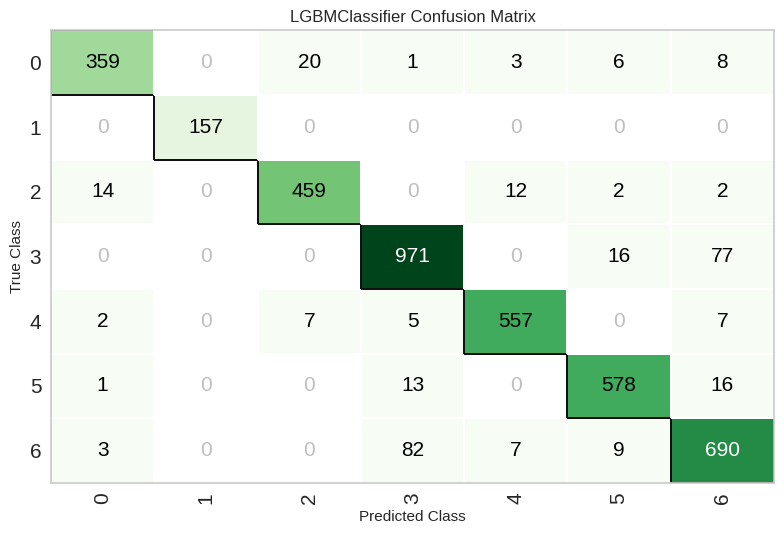

In [ ]:
plot_model(best, plot = 'confusion_matrix')

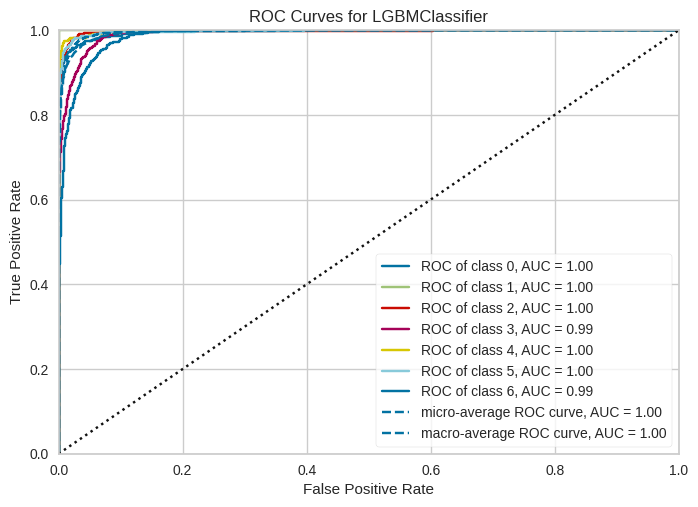

In [ ]:
plot_model(best, plot = 'auc')

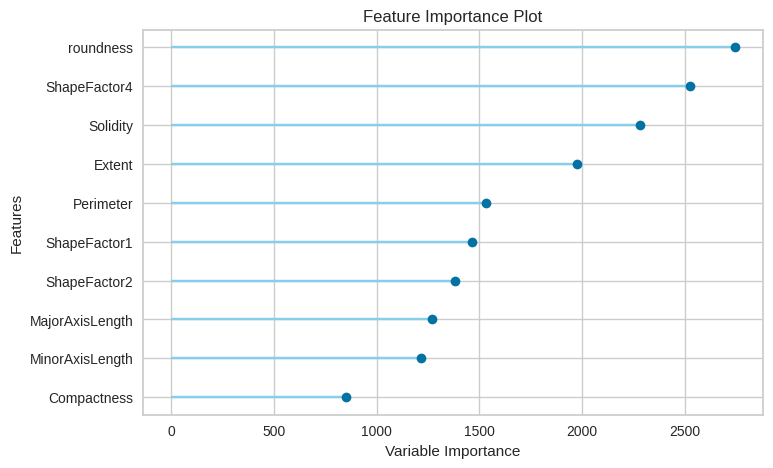

In [ ]:
plot_model(best, plot = 'feature')

In [ ]:
holdout_pred = predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9234,0.9938,0.9234,0.9236,0.9234,0.9073,0.9073


In [ ]:
holdout_pred.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class,prediction_label,prediction_score
1785,45628,777.737000,265.039551,219.313583,1.208496,0.561503,46097,241.029816,0.776977,0.989826,0.947929,0.909411,0.005809,0.002451,0.827028,0.999460,SEKER,SEKER,1.0000
1315,41169,742.125977,270.214111,194.199829,1.391423,0.695332,41553,228.949768,0.758876,0.990759,0.939344,0.847290,0.006564,0.002087,0.717901,0.998904,SEKER,SEKER,0.9234
13599,42023,746.715027,272.962677,196.334045,1.390297,0.694730,42365,231.312225,0.795348,0.991927,0.947081,0.847413,0.006496,0.002066,0.718109,0.998385,DERMASON,SEKER,0.8600
4297,69589,994.968994,376.521118,237.279205,1.586827,0.776442,70481,297.663330,0.758397,0.987344,0.883347,0.790562,0.005411,0.001304,0.624988,0.991749,CALI,CALI,0.9976
3986,62741,957.314026,365.757294,221.407745,1.651962,0.795967,63687,282.638153,0.756846,0.985146,0.860305,0.772748,0.005830,0.001282,0.597139,0.986452,CALI,CALI,0.9998


In [ ]:
new_data = df.copy()
new_data.drop('Class', axis=1, inplace=True)
new_data.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166


In [ ]:
predictions = predict_model(best, data = new_data)
predictions.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,prediction_label,prediction_score
0,28395,610.291016,208.178116,173.888748,1.197191,0.549812,28715,190.141098,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,DERMASON,0.9512
1,28734,638.018005,200.524796,182.734421,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909850,0.998430,SEKER,0.9990
2,29380,624.109985,212.826126,175.931137,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER,0.9936
3,30008,645.883972,210.557999,182.516510,1.153638,0.498616,30724,195.467056,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER,0.9878
4,30140,620.133972,201.847885,190.279282,1.060798,0.333680,30417,195.896500,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER,0.9999


In [ ]:
save_model(best, 'my_first_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Area', 'Perimeter',
                                              'MajorAxisLength',
                                              'MinorAxisLength', 'AspectRation',
                                              'Eccentricity', 'ConvexArea',
                                              'EquivDiameter', 'Extent',
                                              'Solidity', 'round...
                  LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                 colsample_bytree=1.0, device='gpu',
                                 importance_type='split', learning_rate=0.1,
                              

In [ ]:
loaded_best_pipeline = load_model('my_first_pipeline')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Area', 'Perimeter',
                                             'MajorAxisLength',
                                             'MinorAxisLength', 'AspectRation',
                                             'Eccentricity', 'ConvexArea',
                                             'EquivDiameter', 'Extent',
                                             'Solid...
                 LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, device='gpu',
                                importance_type='split', learning_rate=0.1,
                                max_depth=-1, min_child_samples=20,
                                min_child_weight=0.001, min_split_gain=0.0,
                                n_estimators=100, n_jobs=-1, num_leaves=31,
                                objective=None, random_state=42, reg_alpha=0.0,
                                reg_lambda=0.0, subsample=1.0,
                                subsample_for_bin=200000, subsample_freq=0))],
         verbose=False)